In [ ]:
import numpy as np
import pandas as pd

from datetime import datetime
from sklearn.model_selection import train_test_split

from matplotlib import pyplot
import matplotlib.pyplot as plt

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/DACON CUP'

train_df = pd.read_csv(path + '/open_data/train.csv', encoding = 'euc-kr')
train_df.head()

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2018-09-09 00:00:00,19,19,8,206
1,2018-09-09 01:00:00,20,19,9,259
2,2018-09-09 02:00:00,12,9,1,48
3,2018-09-09 03:00:00,10,10,2,102
4,2018-09-09 04:00:00,6,5,3,18


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19008 entries, 0 to 19007
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  19008 non-null  object
 1   사용자       19008 non-null  int64 
 2   세션        19008 non-null  int64 
 3   신규방문자     19008 non-null  int64 
 4   페이지뷰      19008 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 742.6+ KB


In [ ]:
# date 기준으로.

train_df['DateTime'] = pd.to_datetime(train_df.DateTime) #dtype: datetime으로 변경
train_df['date'] = train_df.DateTime.dt.date
train_df  = train_df.groupby('date').sum().reset_index()
train_df.head()

,date,사용자,세션,신규방문자,페이지뷰
0,2018-09-09,281,266,73,1826
1,2018-09-10,264,247,51,2092
2,2018-09-11,329,310,58,1998
3,2018-09-12,300,287,45,2595
4,2018-09-13,378,344,50,3845


In [ ]:
# date 기준 변수 만들기



def create_features(df):
    """
    Creates time series features from datetime index
    """
    # df['DateTime'] = df.index
    # df['hour'] = df['date'].dt.hour
    df['dayofweek'] = pd.to_datetime(df['date']).dt.dayofweek #요일
    df['quarter'] = pd.to_datetime(df['date']).dt.quarter 
    df['month'] = pd.to_datetime(df['date']).dt.month
    df['year'] = pd.to_datetime(df['date']).dt.year # 날짜의 해당 연도 시작에서부터의 일 수를 반환 
    df['dayofyear'] = pd.to_datetime(df['date']).dt.dayofyear
    df['dayofmonth'] = pd.to_datetime(df['date']).dt.day
    df['weekofyear'] = pd.to_datetime(df['date']).dt.weekofyear
    
    X = df[['사용자','세션','신규방문자','페이지뷰','date','dayofweek','quarter','month','year' #]]
           ,'dayofyear','dayofmonth','weekofyear']]
    X.set_index('date', inplace = True)
    X.index = pd.to_datetime(X.index)
    return X

In [ ]:
train = create_features(train_df)
train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


,사용자,세션,신규방문자,페이지뷰,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,,,,
2018-09-09,281,266,73,1826,6,3,9,2018,252,9,36
2018-09-10,264,247,51,2092,0,3,9,2018,253,10,37
2018-09-11,329,310,58,1998,1,3,9,2018,254,11,37
2018-09-12,300,287,45,2595,2,3,9,2018,255,12,37
2018-09-13,378,344,50,3845,3,3,9,2018,256,13,37
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04,4516,4472,1196,112683,2,4,11,2020,309,4,45
2020-11-05,4155,4037,1044,102901,3,4,11,2020,310,5,45
2020-11-06,3663,3576,825,88015,4,4,11,2020,311,6,45


In [ ]:
# len(train['dayofyear'].unique())

365

##### EDA 

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_

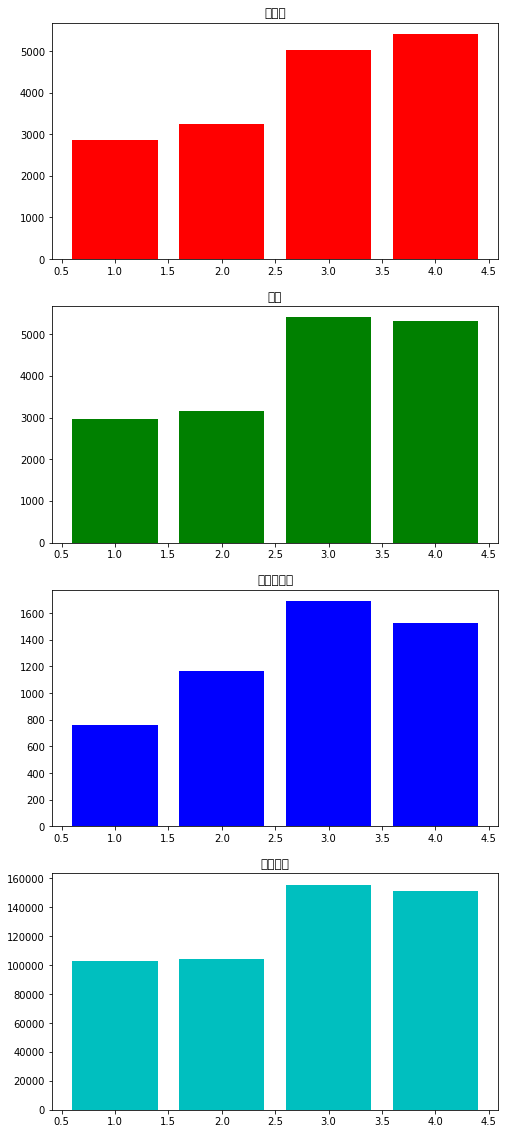

In [ ]:
# quarter간에 차이가 있는지 확인

fig, axes = plt.subplots(4, 1, figsize=(8, 20))
axes[0].bar(train['quarter'], train['사용자'], color='r')
axes[1].bar(train['quarter'], train['세션'], color='g')
axes[2].bar(train['quarter'], train['신규방문자'], color='b')
axes[3].bar(train['quarter'], train['페이지뷰'], color='c')
for i, title in enumerate(['사용자','세션','신규방문자','페이지뷰']):
    axes[i].set_title(title)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_

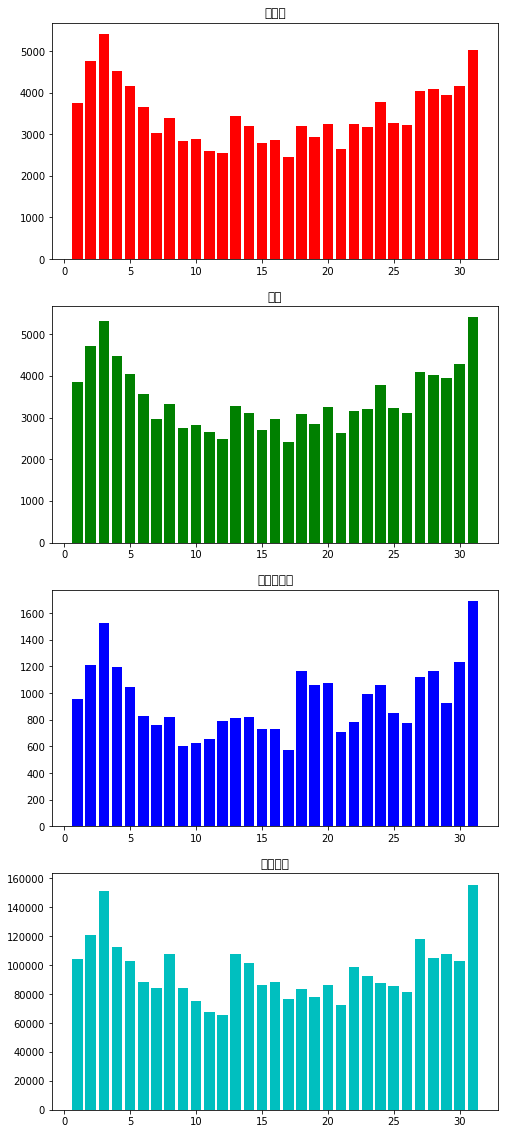

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(8, 20))
axes[0].bar(train['dayofmonth'], train['사용자'], color='r')
axes[1].bar(train['dayofmonth'], train['세션'], color='g')
axes[2].bar(train['dayofmonth'], train['신규방문자'], color='b')
axes[3].bar(train['dayofmonth'], train['페이지뷰'], color='c')
for i, title in enumerate(['사용자','세션','신규방문자','페이지뷰']):
    axes[i].set_title(title)
plt.show()

#### 범주형 인코딩

- one-hot 인코딩: 카테고리가 별로 없는거
- binary 인코딩: 카테고리가 많은 거

In [ ]:
pip install category_encoders

     |████████████████████████████████| 81kB 3.3MB/s 


In [ ]:
import category_encoders as ce

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# bianry encoding

# dayofyear	dayofmonth	weekofyear

encoder = ce.BinaryEncoder(cols=['dayofyear'])
train = encoder.fit_transform(train)

encoder = ce.BinaryEncoder(cols=['dayofmonth'])
train = encoder.fit_transform(train)

encoder = ce.BinaryEncoder(cols=['weekofyear'])
train = encoder.fit_transform(train)

print(train.shape)
# train.head(3)

(792, 31)


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
# one-hot encoding

def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
        data = data.drop(column, axis=1)
    return data


dummy_columns = ["dayofweek", "quarter", "month", "year"]
train = dummy_data(train,dummy_columns)

print(train.shape)
train.head(3)

(792, 53)


,사용자,세션,신규방문자,페이지뷰,dayofyear_0,dayofyear_1,dayofyear_2,dayofyear_3,dayofyear_4,dayofyear_5,dayofyear_6,dayofyear_7,dayofyear_8,dayofyear_9,dayofmonth_0,dayofmonth_1,dayofmonth_2,dayofmonth_3,dayofmonth_4,dayofmonth_5,weekofyear_0,weekofyear_1,weekofyear_2,weekofyear_3,weekofyear_4,weekofyear_5,weekofyear_6,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,quarter_1,quarter_2,quarter_3,quarter_4,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2018,year_2019,year_2020
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-09-09,281,266,73,1826,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2018-09-10,264,247,51,2092,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2018-09-11,329,310,58,1998,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


- 추가데이터 가공

In [ ]:
'''
user =  pd.read_csv(path + '/open_data/info_user.csv', encoding = 'euc-kr')
login = pd.read_csv(path +'/open_data/info_login.csv', encoding = 'euc-kr')
competition = pd.read_csv(path +'/open_data/info_competition.csv', encoding = 'euc-kr')
info_submission =  pd.read_csv(path +'/open_data/info_submission.csv', encoding = 'euc-kr')
'''

"\nuser =  pd.read_csv(path + '/open_data/info_user.csv', encoding = 'euc-kr')\nlogin = pd.read_csv(path +'/open_data/info_login.csv', encoding = 'euc-kr')\ncompetition = pd.read_csv(path +'/open_data/info_competition.csv', encoding = 'euc-kr')\ninfo_submission =  pd.read_csv(path +'/open_data/info_submission.csv', encoding = 'euc-kr')\n"

- 데이터 전처리

In [ ]:
# scaling

mini = train.iloc[:,:4].min()
size = train.iloc[:,:4].max() - train.iloc[:,:4].min()
train.iloc[:,:4] = (train.iloc[:,:4] -  mini) / size
train

,사용자,세션,신규방문자,페이지뷰,dayofyear_0,dayofyear_1,dayofyear_2,dayofyear_3,dayofyear_4,dayofyear_5,dayofyear_6,dayofyear_7,dayofyear_8,dayofyear_9,dayofmonth_0,dayofmonth_1,dayofmonth_2,dayofmonth_3,dayofmonth_4,dayofmonth_5,weekofyear_0,weekofyear_1,weekofyear_2,weekofyear_3,weekofyear_4,weekofyear_5,weekofyear_6,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,quarter_1,quarter_2,quarter_3,quarter_4,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2018,year_2019,year_2020
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-09-09,0.051689,0.049083,0.042604,0.011735,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2018-09-10,0.048551,0.045564,0.029586,0.013446,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2018-09-11,0.060550,0.057233,0.033728,0.012842,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2018-09-12,0.055197,0.052973,0.026036,0.016682,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2018-09-13,0.069596,0.063530,0.028994,0.024724,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04,0.833487,0.828116,0.707101,0.724949,0,0,0,0,1,1,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2020-11-05,0.766845,0.747546,0.617160,0.662015,0,0,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2020-11-06,0.676020,0.662160,0.487574,0.566244,0,0,0,0,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
# scaling

input_window = 61
output_window = 61 # 7

window_x = np.zeros((train.shape[0] - (input_window + output_window), input_window, 53))
window_y = np.zeros((train.shape[0] - (input_window + output_window), output_window, 4))

for start in range(train.shape[0] - (input_window + output_window)):
    end = start + input_window    
    window_x[start,:, :] = train.iloc[start : end                , : ].values
    window_y[start,:, :] = train.iloc[end   : end + output_window, :4 ].values


print('window_x.shape: ', window_x.shape)
print('window_y.shape: ', window_y.shape)

window_x.shape:  (670, 61, 53)
window_y.shape:  (670, 61, 4)


In [ ]:
# window_x

- 시계열 데이터 임베딩 찾아서 적용해보기
- 스케일링 다르게 해보기
- dropout 적용해보기

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential

from tensorflow.keras.layers import Dense, Conv1D, LSTM, Input, TimeDistributed
from tensorflow.keras.models import Model


optimizer = Adam, loss = mse, activation_function = 따로지정x

In [ ]:
model = Sequential()
model.add(LSTM(32, input_shape=(61, 53), return_sequences=True))  # (timestep, features)
model.add(LSTM(32, return_sequences=True)) 
model.add(LSTM(32, return_sequences=True)) 
# model.add(LSTM(32, return_sequences=True)) 
#model.add(LSTM(32, return_sequences=True)) 
# model.add(LSTM(32, return_sequences=True)) 
model.add(TimeDistributed(Dense(4)))

model.summary()

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt)

model.fit(window_x, window_y, epochs=100, batch_size=50)

# lstm2층 - epochs100, batch_size=10

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_99 (LSTM)               (None, 61, 32)            11008     
_________________________________________________________________
lstm_100 (LSTM)              (None, 61, 32)            8320      
_________________________________________________________________
lstm_101 (LSTM)              (None, 61, 32)            8320      
_________________________________________________________________
time_distributed_27 (TimeDis (None, 61, 4)             132       
Total params: 27,780
Trainable params: 27,780
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
14/14 [==============================] - 6s 74ms/step - loss: 0.0479
Epoch 2/100
14/14 [==============================] - 1s 77ms/step - loss: 0.0095
Epoch 3/100
14/14 [==============================] - 1s 77ms/step - loss: 0.0075
Epoc

## test : last_df

In [ ]:
# train은 이미 위에서 minmax scaler적용되어있음.

last_df = train.iloc[-61:,:].values[np.newaxis,...] # np.newaxis: 3D로 차원을 늘려줌. 
last_df.shape

(1, 61, 53)

In [ ]:
pred_last = model.predict(last_df)
pred_last[:5]

array([[[0.7179821 , 0.716253  , 0.59551203, 0.6763035 ],
        [0.8223673 , 0.81479317, 0.70578754, 0.82187015],
        [0.6181322 , 0.6167823 , 0.47234094, 0.5461531 ],
        [0.66319484, 0.6684899 , 0.56339824, 0.55420184],
        [0.5415285 , 0.5337838 , 0.40740708, 0.4663254 ],
        [0.31102896, 0.30416837, 0.21576713, 0.205109  ],
        [0.2948836 , 0.28378832, 0.19437703, 0.19543651],
        [0.6323293 , 0.6124578 , 0.4567476 , 0.5543605 ],
        [0.6716483 , 0.64405227, 0.4627515 , 0.617362  ],
        [0.5920792 , 0.5632698 , 0.35359153, 0.5301848 ],
        [0.65450674, 0.63732487, 0.42240056, 0.6125193 ],
        [0.57821405, 0.56107587, 0.3375425 , 0.54486537],
        [0.43582094, 0.41236988, 0.2186311 , 0.3517167 ],
        [0.44056073, 0.41834727, 0.24307173, 0.34691277],
        [0.62484413, 0.5980978 , 0.39707965, 0.54768527],
        [0.6179175 , 0.58851826, 0.37450707, 0.49843335],
        [0.6629019 , 0.62900203, 0.40554932, 0.52761453],
        [0.680

In [ ]:
pred_last = pred_last.reshape(output_window,4)
pred_last = pred_last * size[:4].values + mini[:4].values
pred_last = pred_last.astype(int)
pred_last


array([[  3890,   3868,   1007, 105121],
       [  4455,   4400,   1193, 127747],
       [  3349,   3331,    799,  84892],
       [  3593,   3610,    953,  86143],
       [  2934,   2882,    689,  72484],
       [  1685,   1643,    365,  31882],
       [  1598,   1533,    329,  30379],
       [  3426,   3307,    772,  86167],
       [  3639,   3478,    783,  95960],
       [  3208,   3042,    598,  82410],
       [  3546,   3441,    714,  95207],
       [  3133,   3030,    571,  84692],
       [  2361,   2227,    370,  54670],
       [  2387,   2259,    411,  53923],
       [  3385,   3230,    672,  85130],
       [  3348,   3178,    633,  77474],
       [  3591,   3396,    686,  82010],
       [  3687,   3433,    716,  86551],
       [  3365,   3088,    612,  80142],
       [  2480,   2191,    388,  50720],
       [  2428,   2136,    363,  47201],
       [  3292,   2976,    564,  75139],
       [  3121,   2783,    496,  72241],
       [  3180,   2839,    462,  76022],
       [  3850, 

In [ ]:
pred_last.shape

(61, 4)

## submit

In [ ]:
submission =  pd.read_csv(path + '/open_data/submission.csv', encoding = 'euc-kr')
submission.shape

(61, 5)

In [ ]:
pred_last.shape

(61, 4)

In [ ]:
pred_df = pd.DataFrame(pred_last)
pred_df.head()

,0,1,2,3
0,3890,3868,1007,105121
1,4455,4400,1193,127747
2,3349,3331,799,84892
3,3593,3610,953,86143
4,2934,2882,689,72484


In [ ]:
# 30까지 모두 채우면 다시 0부터.

for i in range(len(submission)):
  submission['사용자'][i] = pred_df[0][i]
  submission['세션'][i] = pred_df[1][i]
  submission['신규방문자'][i] = pred_df[2][i]
  submission['페이지뷰'][i] = pred_df[3][i]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: Se

In [ ]:
submission.head()

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2020-11-09,3890,3868,1007,105121
1,2020-11-10,4455,4400,1193,127747
2,2020-11-11,3349,3331,799,84892
3,2020-11-12,3593,3610,953,86143
4,2020-11-13,2934,2882,689,72484


In [ ]:
submission.to_csv('add 날짜feature.csv', index = False, encoding = 'euc-kr')

#### 결과 제일 좋았던, 나빴던 파일이랑 predict를 비교

In [ ]:
best = pd.read_csv('61 lstm3.csv', encoding = 'euc-kr')
best.set_index('DateTime', inplace = True)
best.index = pd.to_datetime(best.index)
best.head()

,사용자,세션,신규방문자,페이지뷰
DateTime,,,,
2020-11-09,2382,2342,558,65910
2020-11-10,2800,2752,676,76967
2020-11-11,2864,2819,716,76131
2020-11-12,2614,2581,700,67805
2020-11-13,2604,2600,722,65712


In [ ]:
worst = pd.read_csv('feature 추가 인코딩x.csv', encoding = 'euc-kr')
worst.set_index('DateTime', inplace = True)
worst.index = pd.to_datetime(best.index)
#worst.head()

In [ ]:
submission.set_index('DateTime', inplace = True)
submission.index = pd.to_datetime(submission.index)
# submission.head()

KeyError: ignored

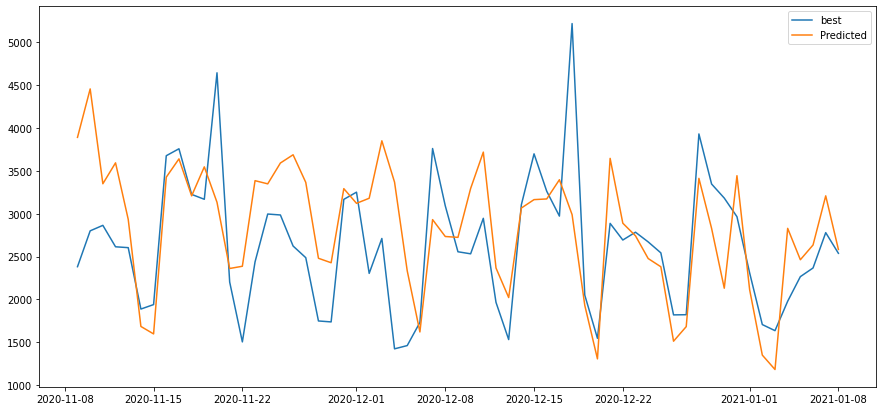

In [ ]:
# plot expected vs preducted


plt.figure(figsize = (15,7))
pyplot.plot(best['사용자'], label='best')
pyplot.plot(submission['사용자'], label='Predicted')
# pyplot.plot(worst['사용자'], label = 'worst')
pyplot.legend()
pyplot.show()

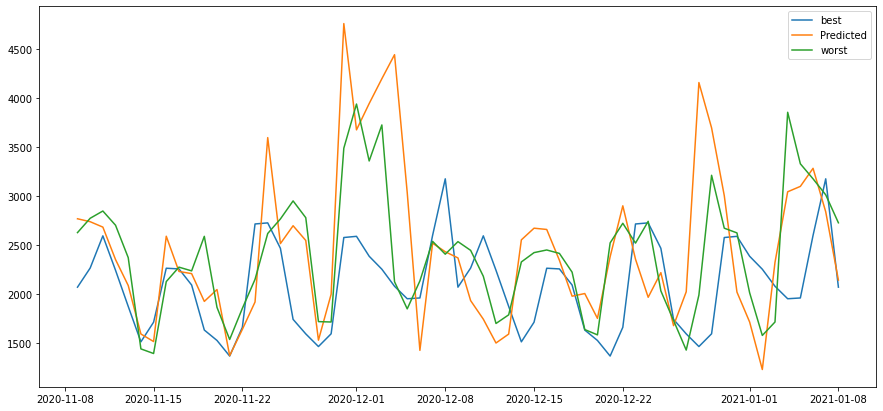

In [ ]:

plt.figure(figsize = (15,7))
pyplot.plot(best['세션'], label='best')
pyplot.plot(submission['세션'], label='Predicted')
pyplot.plot(worst['세션'], label = 'worst')
pyplot.legend()
pyplot.show()

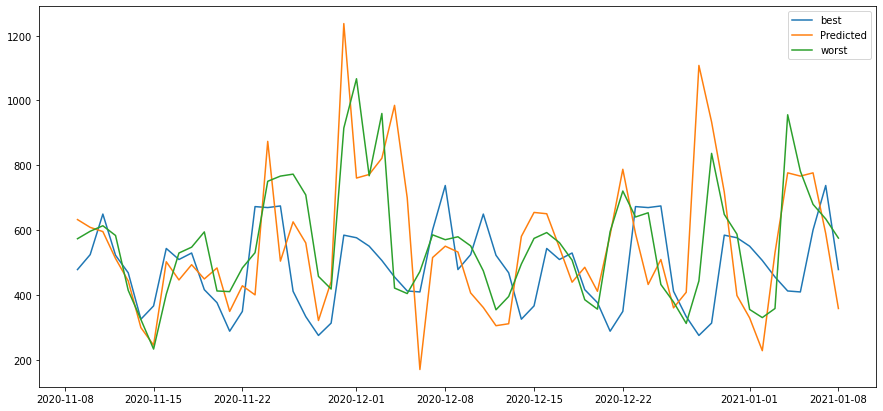

In [ ]:

plt.figure(figsize = (15,7))
pyplot.plot(best['신규방문자'], label='best')
pyplot.plot(submission['신규방문자'], label='Predicted')
pyplot.plot(worst['신규방문자'], label = 'worst')
pyplot.legend()
pyplot.show()

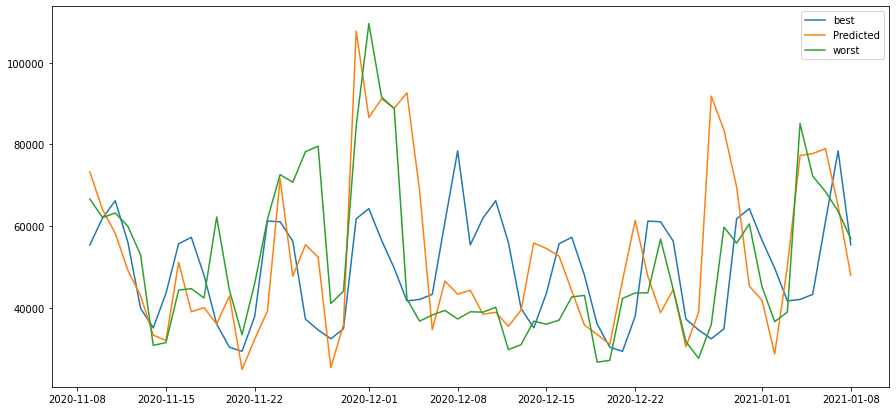

In [ ]:

plt.figure(figsize = (15,7))
pyplot.plot(best['페이지뷰'], label='best')
pyplot.plot(submission['페이지뷰'], label='Predicted')
pyplot.plot(worst['페이지뷰'], label = 'worst')
pyplot.legend()
pyplot.show()

- 위에 잘 예측하지 못하는 부분들은 조금 튀는 값인 것 같음
- 해당 일자에 어떤 특징(개최된 대회 등)을 파악
- 이후 1) 제거 또는 2) 특징 적용  (추세파악과 관련없다면 제거하기)

## 참조

In [ ]:
# 각 변수의 크기가 다르기 때문에 가중치를 부여한 RMSE로 모델의 성능을 평가

def dacon_rmse(true, pred):
    # true.shape // (N,4)
    # pred.shape // (N,4)
    # w0, w1, w2, w3 <= train.csv의 사용자 수, 세션 수, 신규 방문자 수, 페이지 뷰 수 4가지 항목별 평균값
    score = np.sqrt(np.mean(np.square(true[:,0] - pred[:,0]))) / w0 +\
            + np.sqrt(np.mean(np.square(true[:,1] - pred[:,1]))) / w1 +\
            + np.sqrt(np.mean(np.square(true[:,2] - pred[:,2]))) / w2 +\
            + np.sqrt(np.mean(np.square(true[:,3] - pred[:,3]))) / w3 +\
     return score

In [ ]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

train_sc

In [ ]:
# date 기준 변수 만들기

from datetime import datetime

def create_features(df):
    """
    Creates time series features from datetime index
    """
    # df['DateTime'] = df.index
    # df['hour'] = df['date'].dt.hour
    df['dayofweek'] = pd.to_datetime(df['date']).dt.dayofweek
    df['quarter'] = pd.to_datetime(df['date']).dt.quarter
    df['month'] = pd.to_datetime(df['date']).dt.month
    df['year'] = pd.to_datetime(df['date']).dt.year
    df['dayofyear'] = pd.to_datetime(df['date']).dt.dayofyear
    df['dayofmonth'] = pd.to_datetime(df['date']).dt.day
    df['weekofyear'] = pd.to_datetime(df['date']).dt.weekofyear
    
    X = df[['사용자','세션','신규방문자','페이지뷰','date','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    X.set_index('date', inplace = True)
    X.index = pd.to_datetime(X.index)
    return X

## 예측값을 x로 다시 predict  
- 마이너스 값이 나와서 실패..

In [ ]:
tr_month1 = pd.DataFrame(pred_month)

In [ ]:
# 위 예측값을 x로 사용하기.
mini1 = tr_month1.iloc[:,1:].min()
size1 = tr_month1.iloc[:,1:].max() - tr_month1.iloc[:,1:].min()
tr_month1.iloc[:,1:] = (tr_month1.iloc[:,1:] -  mini1) / size1

tr_month1 = tr_month1.iloc[:,:].values[np.newaxis,...] # np.newaxis: 3D로 차원을 늘려줌. 
tr_month1.shape

(1, 30, 4)

In [ ]:
pred_month1 = model.predict(tr_month1)
pred_month1[:5]

array([[[ 0.18093495,  0.15617856,  0.17545578,  0.07859027],
        [ 0.09990777,  0.06255519,  0.09158635, -0.03202646],
        [ 0.1238751 ,  0.08535202,  0.10137758, -0.0130481 ],
        [ 0.1609668 ,  0.12201263,  0.13407502,  0.02669705],
        [ 0.17643648,  0.13653305,  0.14765052,  0.04409892],
        [ 0.17911391,  0.13828306,  0.1470722 ,  0.04774056],
        [ 0.18096438,  0.13957691,  0.14543536,  0.05040792],
        [ 0.18431361,  0.14262158,  0.14594844,  0.05457786],
        [ 0.18804072,  0.14617258,  0.14746507,  0.05902395],
        [ 0.19144723,  0.14947562,  0.14904726,  0.06302298],
        [ 0.19444391,  0.15241605,  0.15047295,  0.06651456],
        [ 0.19708903,  0.15503576,  0.15175058,  0.0695814 ],
        [ 0.19941911,  0.15735956,  0.1528904 ,  0.07227365],
        [ 0.20145619,  0.1594011 ,  0.15389048,  0.07462133],
        [ 0.20322528,  0.16118066,  0.15475564,  0.07665686],
        [ 0.20475666,  0.1627254 ,  0.15549937,  0.07841668],
        

In [ ]:
pred_month1 = pred_month1.reshape(output_window,4)
pred_month1 = pred_month1 * size.values + mini.values
pred_month1 = pred_month1.astype(int)
pred_month1


array([[  981,   844,   297, 12217],
       [  542,   338,   155, -4975],
       [  672,   461,   172, -2026],
       [  872,   659,   227,  4151],
       [  956,   738,   250,  6856],
       [  971,   747,   249,  7422],
       [  981,   754,   246,  7837],
       [  999,   771,   247,  8485],
       [ 1019,   790,   250,  9176],
       [ 1038,   808,   252,  9797],
       [ 1054,   823,   255, 10340],
       [ 1068,   838,   257, 10817],
       [ 1081,   850,   259, 11235],
       [ 1092,   861,   261, 11600],
       [ 1101,   871,   262, 11917],
       [ 1110,   879,   263, 12190],
       [ 1117,   886,   264, 12426],
       [ 1123,   893,   265, 12630],
       [ 1128,   898,   266, 12805],
       [ 1133,   903,   267, 12957],
       [ 1137,   907,   267, 13087],
       [ 1140,   910,   268, 13200],
       [ 1143,   913,   268, 13297],
       [ 1146,   916,   269, 13382],
       [ 1148,   918,   269, 13455],
       [ 1150,   920,   269, 13518],
       [ 1152,   922,   269, 13573],
 

#### 윈도우 크기 다르게 해서 train하고 test해보기

aa

## test = train[-61]

In [ ]:
test = train[-61:]
test

,date,사용자,세션,신규방문자,페이지뷰
731,2020-09-09,0.497877,0.490461,0.355030,0.377532
732,2020-09-10,0.452464,0.450824,0.324260,0.339207
733,2020-09-11,0.405206,0.397111,0.278107,0.321836
734,2020-09-12,0.298320,0.295425,0.194083,0.242021
735,2020-09-13,0.342810,0.333951,0.198817,0.288169
...,...,...,...,...,...
787,2020-11-04,0.833487,0.828116,0.707101,0.724949
788,2020-11-05,0.766845,0.747546,0.617160,0.662015
789,2020-11-06,0.676020,0.662160,0.487574,0.566244
790,2020-11-07,0.456157,0.447490,0.313609,0.369188


In [ ]:
# scaling

input_window = 30
output_window = 30

test_x = np.zeros((test.shape[0] - (input_window + output_window), input_window, 4))
test_y = np.zeros((test.shape[0] - (input_window + output_window), output_window, 4))

for start in range(test.shape[0] - (input_window + output_window)):
    end = start + input_window    
    test_x[start,:, :] = test.iloc[start : end                , 1: ].values
    test_y[start,:, :] = test.iloc[end   : end + output_window, 1: ].values


print('test_x.shape: ', test_x.shape)
print('test_y.shape: ', test_y.shape)

test_x.shape:  (1, 30, 4)
test_y.shape:  (1, 30, 4)


In [ ]:
pred = model.predict(test_x)
pred[:5]

array([[[0.40022817, 0.39372706, 0.27692318, 0.33888835],
        [0.38961065, 0.3810348 , 0.25960314, 0.3113099 ],
        [0.4294502 , 0.41507578, 0.28880233, 0.3883028 ],
        [0.57350516, 0.56259114, 0.4501635 , 0.5218927 ],
        [0.4765348 , 0.467364  , 0.3573951 , 0.40904856],
        [0.4156783 , 0.4077924 , 0.30611813, 0.35120863],
        [0.39636064, 0.39218706, 0.30435696, 0.30528963],
        [0.36307785, 0.3584634 , 0.27156314, 0.28400347],
        [0.27903116, 0.27569184, 0.22178051, 0.19545761],
        [0.37462008, 0.3721298 , 0.3127888 , 0.26252687],
        [0.47159705, 0.46326333, 0.39487627, 0.3773024 ],
        [0.5758832 , 0.5726595 , 0.5498195 , 0.51826733],
        [0.4800876 , 0.47606337, 0.40594587, 0.41935587],
        [0.5029881 , 0.49729228, 0.44717255, 0.40659106],
        [0.41189307, 0.40996557, 0.32963312, 0.3260718 ],
        [0.32444862, 0.31973892, 0.24362595, 0.24606156],
        [0.31358963, 0.30821908, 0.22619447, 0.24227071],
        [0.573

In [ ]:
pred = pred.reshape(output_window,4)
pred = pred * size.values + mini.values
pred = pred.astype(int)
pred

array([[  2169,   2126,    469,  52676],
       [  2111,   2058,    439,  48389],
       [  2327,   2241,    489,  60357],
       [  3107,   3038,    761,  81121],
       [  2582,   2524,    604,  63581],
       [  2252,   2202,    518,  54591],
       [  2148,   2118,    515,  47454],
       [  1967,   1936,    459,  44145],
       [  1512,   1489,    375,  30382],
       [  2030,   2010,    529,  40807],
       [  2555,   2502,    668,  58647],
       [  3120,   3092,    930,  80557],
       [  2601,   2571,    687,  65183],
       [  2725,   2685,    756,  63199],
       [  2232,   2214,    558,  50684],
       [  1758,   1727,    412,  38248],
       [  1699,   1665,    383,  37658],
       [  3105,   3034,    777,  77979],
       [  3238,   3187,    846,  80160],
       [  3406,   3323,    811,  87295],
       [  3934,   3844,    924, 103179],
       [  3397,   3309,    775,  89027],
       [  2084,   2102,    496,  55332],
       [  2265,   2250,    480,  51135],
       [  5027, 

In [ ]:
pred.shape

(30, 4)

In [ ]:
baseline = pd.read_csv(path + '/open_data/baseline.csv', encoding = 'euc-kr' )
baseline.head()

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2020-11-09,3252,3263,777,88002
1,2020-11-10,2825,2758,671,73749
2,2020-11-11,2614,2588,599,67300
3,2020-11-12,2391,2373,557,63723
4,2020-11-13,2063,2047,467,54340


In [ ]:
last_month = train.iloc[-30:,1:].values[np.newaxis,...].astype(float) #float() # <- 수정 후
last_month

In [ ]:

#last_month = torch.tensor(window_x[-1,:,:][np.newaxis,...]).float().to(device) <- 수정 전
last_month = train.iloc[-30:,1:].values[np.newaxis,...] # <- 수정 후
# last_month = torch.tensor(last_month).float() # <- 수정 후

for start in range((len(submission) - output_window)//7 + 2):
    start = start * 7
    next_week = model.predict(last_month)
    #last_month = torch.cat([last_month[-7:], next_week], axis = 1) <- 수정 전
    last_month = torch.cat([last_month[:,7:,:], next_week], axis = 1)# <- 수정 후

    pred_week = next_week.reshape(output_window,4)
    pred_week = pred_week * size.values + mini.values
    pred_week = pred_week.astype(int)
    
    if start/7 == (len(submission) - output_window)//7 + 1:
        submission.iloc[start :, 1:] = pred_week[-submission.iloc[start :, 1:].shape[0]:,:]
    else:
        submission.iloc[start : start + output_window, 1:] = pred_week
submission